In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
pd.set_option('display.max_columns', None)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.dtypes
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], format='%m/%d/%y')
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
numericals = data.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [6]:
def differentiate_cont_disc(numericals, threshold=10):
    discrete_vars = []
    continuous_vars = []
    for col in numericals.columns:
        unique_count = numericals[col].nunique()
        if unique_count <= threshold:
           discrete_vars.append(col)
        else: continuous_vars.append(col)
    continuous_df = numericals[continuous_vars]
    discrete_df = numericals[discrete_vars]

    return continuous_df, discrete_df

In [7]:
continuous_df, discrete_df = differentiate_cont_disc(numericals)

In [8]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


In [9]:
discrete_df

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


In [10]:
#X/y split
X = numericals.drop('total_claim_amount',axis=1)
y = numericals['total_claim_amount']

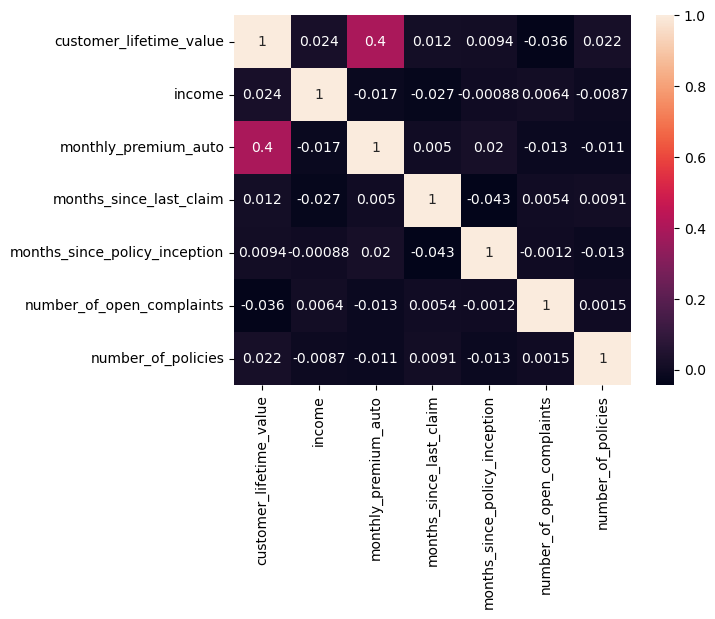

In [11]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()
#There's a weak positive correlation between monthly_premium_auto and customer_lifetime_value
#otherwise there's no significant correlation.

In [12]:
def plot_discrete_variables(discrete_df):
    for col in discrete_df.columns:
            sns.countplot(x=col, data=discrete_df)
            plt.ylabel("Count")
            plt.show()

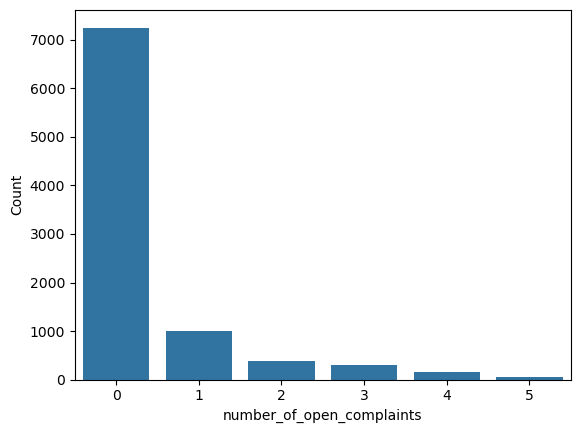

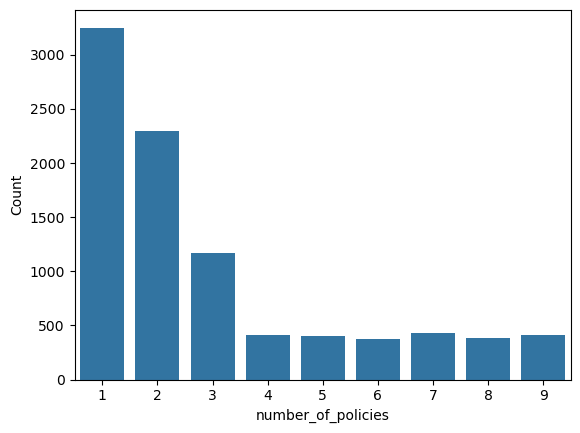

In [13]:
plot_discrete_variables(discrete_df)
#we can see that the majority of customers has no open complaints

In [14]:
def plot_countinuous_variables(continuous_df):
    for col in continuous_df.columns:
            sns.histplot(x=col, data=continuous_df)
            plt.ylabel("Count")
            plt.show()

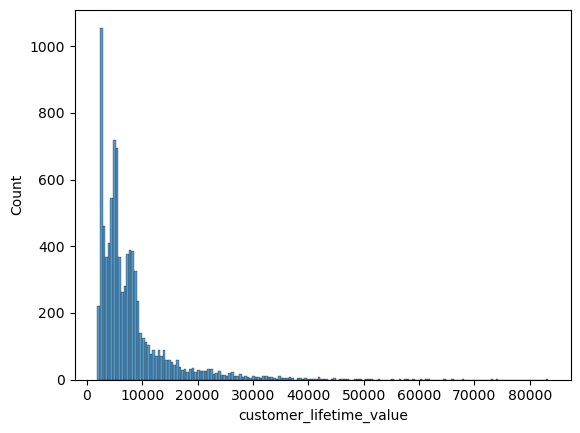

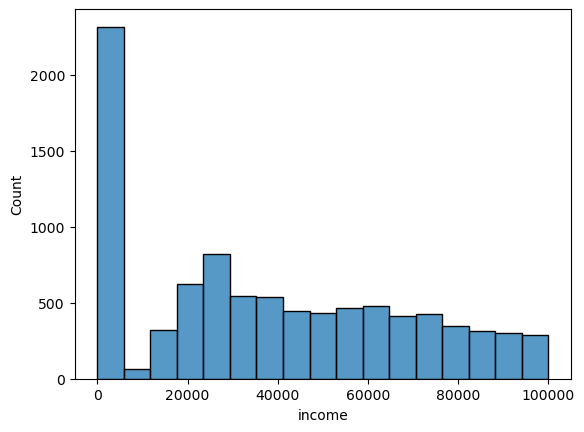

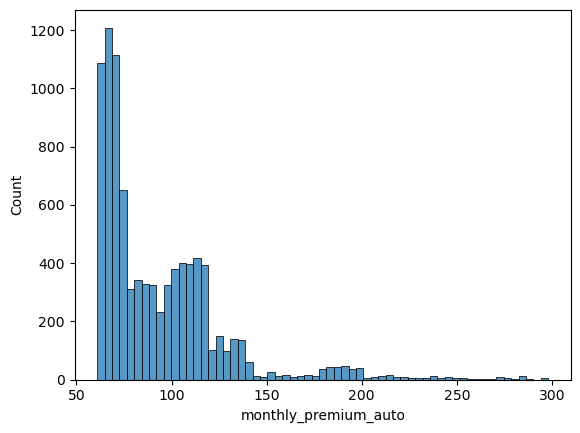

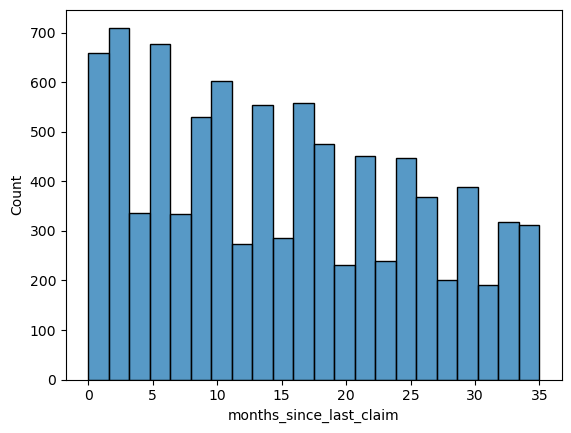

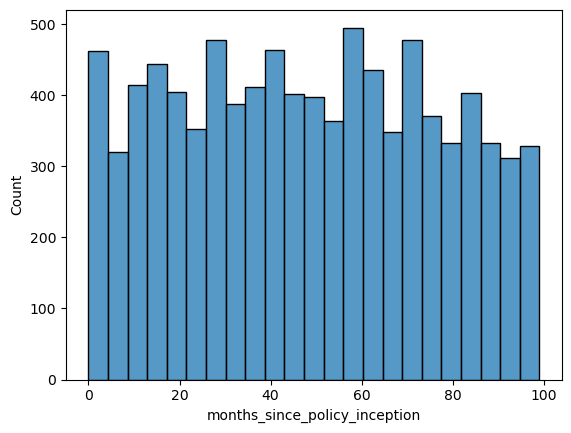

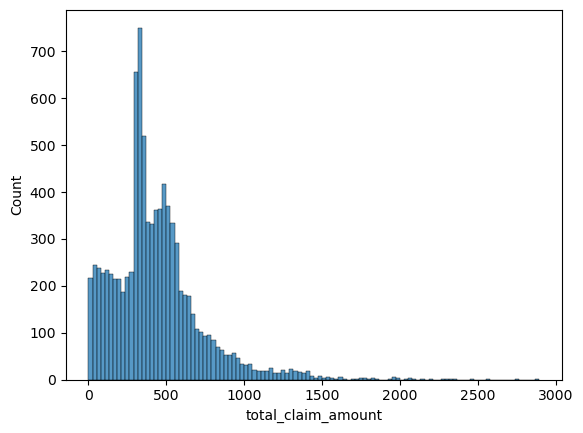

In [15]:
plot_countinuous_variables(continuous_df)

In [16]:
def plot_countinuous_box(continuous_df):
    for col in continuous_df.columns:
            sns.boxplot(x=continuous_df[col])
            plt.show()

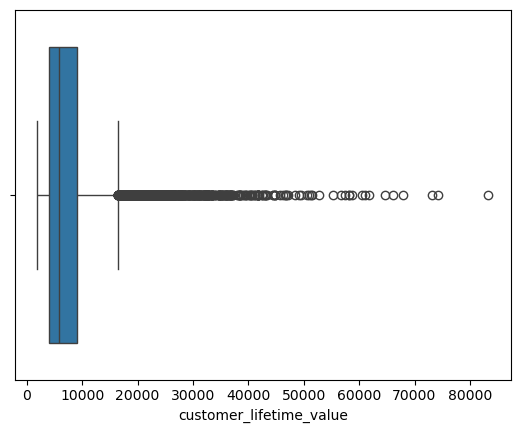

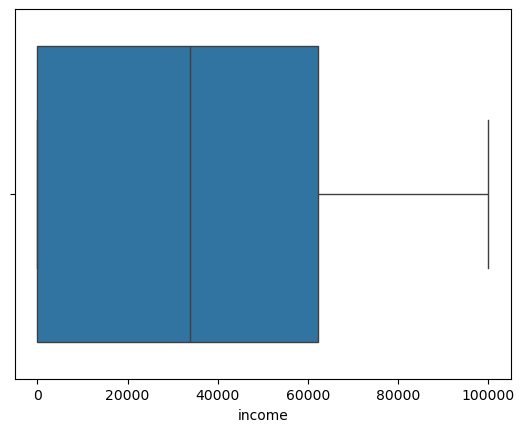

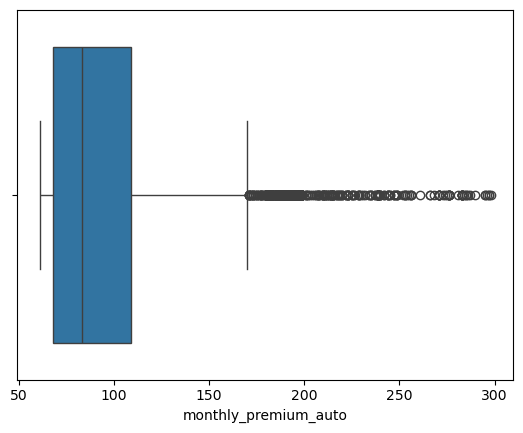

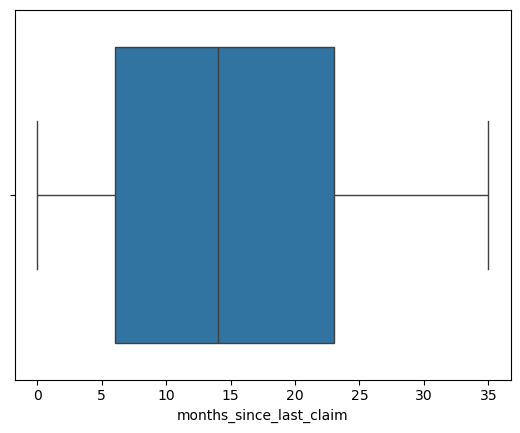

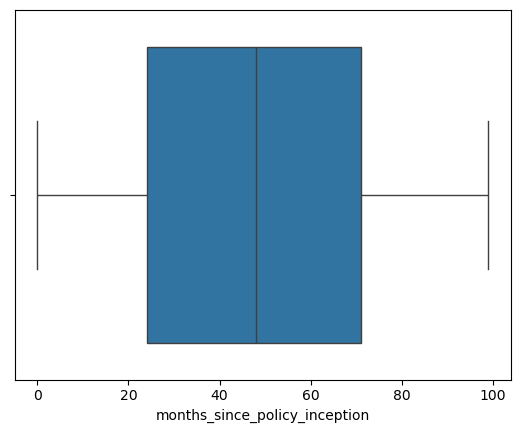

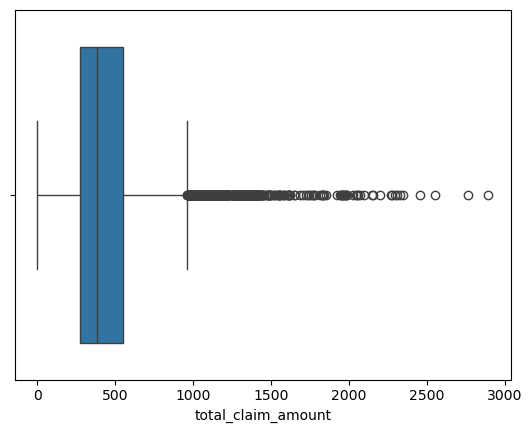

In [17]:
plot_countinuous_box(continuous_df)

In [18]:
numericals[numericals['customer_lifetime_value']> 55000]

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
79,58166.55351,61321,186,0,30,1,2,427.631210
1974,74228.51604,0,242,1,34,0,2,1742.400000
2908,58753.88046,24964,185,0,84,0,2,888.000000
3760,61850.18803,0,238,19,29,0,2,1142.400000
4126,60556.19213,0,204,35,45,0,2,979.200000
4915,56675.93768,77237,283,33,93,0,2,1358.400000
5279,66025.75407,33481,188,28,46,0,2,1194.892002
5716,83325.38119,58958,231,31,74,0,2,1108.800000
6252,73225.95652,39547,202,11,21,0,2,969.600000
6461,55277.44589,40740,198,19,60,0,2,950.400000


In [19]:
#we only have a few outliers (less than 20) so it won't affect the future model badly to drop them. so I will
numericals = numericals.drop(numericals[numericals['customer_lifetime_value']> 55000].index).reset_index(drop=True)
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9114,23405.987980,71941,73,18,89,0,2,198.234764
9115,3096.511217,21604,79,14,28,0,1,379.200000
9116,8163.890428,0,85,9,37,3,2,790.784983
9117,7524.442436,21941,96,34,3,0,3,691.200000


In [20]:
numericals.isnull().sum()
#we don't have null values yaay!

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [21]:
data.to_csv('numerical.csv', index=False)

In [22]:
#Lab 2

In [23]:
categorical_df = data.select_dtypes(object)
categorical_df = categorical_df.drop('customer',axis=1)
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [24]:
categorical_df.isna().sum()/len(categorical_df)
#We have no null values.

state               0.0
response            0.0
coverage            0.0
education           0.0
employmentstatus    0.0
gender              0.0
location_code       0.0
marital_status      0.0
policy_type         0.0
policy              0.0
renew_offer_type    0.0
sales_channel       0.0
vehicle_class       0.0
vehicle_size        0.0
dtype: float64

In [25]:
display(data['state'].value_counts(dropna=False))
display(data['response'].value_counts(dropna=False))
display(data['coverage'].value_counts(dropna=False))
display(data['education'].value_counts(dropna=False)) #maybe gather master and doctor as postgraduate
display(data['employmentstatus'].value_counts(dropna=False)) 
display(data['gender'].value_counts(dropna=False))
display(data['location_code'].value_counts(dropna=False))
display(data['marital_status'].value_counts(dropna=False)) #gather divorced and single together
display(data['policy_type'].value_counts(dropna=False))
display(data['policy'].value_counts(dropna=False)) 
display(data['renew_offer_type'].value_counts(dropna=False))
display(data['sales_channel'].value_counts(dropna=False))
display(data['vehicle_class'].value_counts(dropna=False)) #merge sportscar, luxury SUV and luxury car together as luxury
display(data['vehicle_size'].value_counts(dropna=False))

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

response
No     7826
Yes    1308
Name: count, dtype: int64

coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

gender
F    4658
M    4476
Name: count, dtype: int64

location_code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64

marital_status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64

policy_type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: count, dtype: int64

policy
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: count, dtype: int64

renew_offer_type
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: count, dtype: int64

sales_channel
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: count, dtype: int64

vehicle_class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: count, dtype: int64

vehicle_size
Medsize    6424
Small      1764
Large       946
Name: count, dtype: int64

In [26]:
categorical_df['education'] = np.where(categorical_df['education'].isin(['Master','Doctor']) , 'Postgraduate', categorical_df['education'])
categorical_df['education'] = np.where(categorical_df['education'].isin(['Bachelor','College']) , 'Undergraduate', categorical_df['education'])
categorical_df['education'].value_counts()

education
Undergraduate           5429
High School or Below    2622
Postgraduate            1083
Name: count, dtype: int64

In [27]:
categorical_df['marital_status'] = np.where(categorical_df['marital_status'].isin(['Single','Divorced']) , 'Single', categorical_df['marital_status'])
categorical_df['marital_status'].value_counts()

marital_status
Married    5298
Single     3836
Name: count, dtype: int64

In [28]:
categorical_df['vehicle_class'] = np.where(categorical_df['vehicle_class'].isin(['Sports Car','Luxury SUV','Luxury Car']) , 'Luxury', categorical_df['vehicle_class'])
categorical_df['vehicle_class'].value_counts()

vehicle_class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury            831
Name: count, dtype: int64

In [29]:
categorical_df.dtypes
#I think it makes sense that all of them are categoricals

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [30]:
#6.Does any column contain alpha and numeric data? Decide how to clean it and do it now.
#we have 2 columns in this criteria, policy and renew_offer_type
#I'll drop policy because I don't see it adding so much meaning to 'policy_type', and it has so many values (9 actually)
#I'll change values in renew_offer_type to 1,2,3,4 instead of offer1, offer2..
offer_mapping = {'Offer1': 1,'Offer2': 2,'Offer3': 3,'Offer4': 4}
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].map(offer_mapping)

In [31]:
display(categorical_df['renew_offer_type'].value_counts(dropna=False))

renew_offer_type
1    3752
2    2926
3    1432
4    1024
Name: count, dtype: int64

In [32]:
categorical_df = categorical_df.drop('policy',axis=1).reset_index(drop=True)
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Undergraduate,Employed,F,Suburban,Married,Corporate Auto,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Undergraduate,Unemployed,F,Suburban,Single,Personal Auto,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Undergraduate,Employed,F,Suburban,Married,Personal Auto,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Undergraduate,Unemployed,M,Suburban,Married,Corporate Auto,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Undergraduate,Employed,M,Rural,Single,Personal Auto,1,Agent,Four-Door Car,Medsize


In [33]:
#7.Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.
#No.

In [34]:
#8.Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
#I already did and decided to drop 'policy'

In [35]:
#9.Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.
unique_counts = categorical_df.nunique()
unique_counts
#I think we're good to go :D

state               5
response            2
coverage            3
education           3
employmentstatus    5
gender              2
location_code       3
marital_status      2
policy_type         3
renew_offer_type    4
sales_channel       4
vehicle_class       4
vehicle_size        3
dtype: int64

In [36]:
categorical_df.to_csv('categorical.csv', index=False)

In [37]:
#Lab | Feature extraction

In [38]:
#1. Open the categorical dataframe we created before.
cat_data = pd.read_csv('categorical.csv')
cat_data.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
renew_offer_type     int64
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [39]:
cat_data.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Undergraduate,Employed,F,Suburban,Married,Corporate Auto,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Undergraduate,Unemployed,F,Suburban,Single,Personal Auto,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Undergraduate,Employed,F,Suburban,Married,Personal Auto,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Undergraduate,Unemployed,M,Suburban,Married,Corporate Auto,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Undergraduate,Employed,M,Rural,Single,Personal Auto,1,Agent,Four-Door Car,Medsize


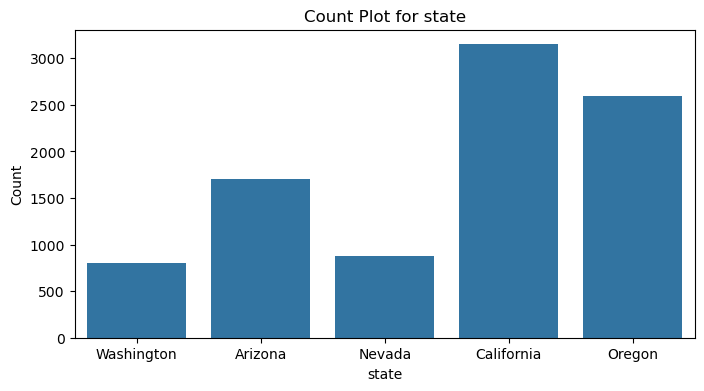

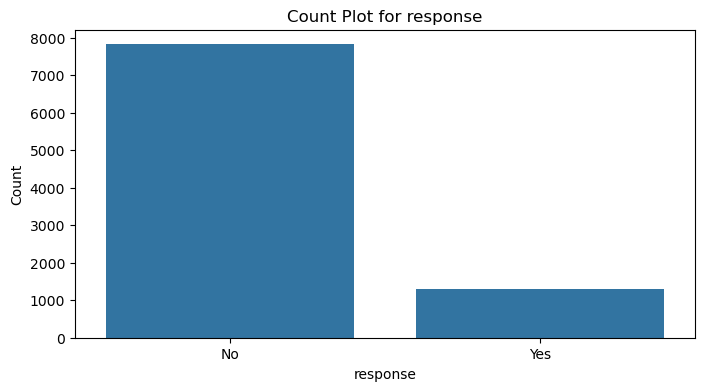

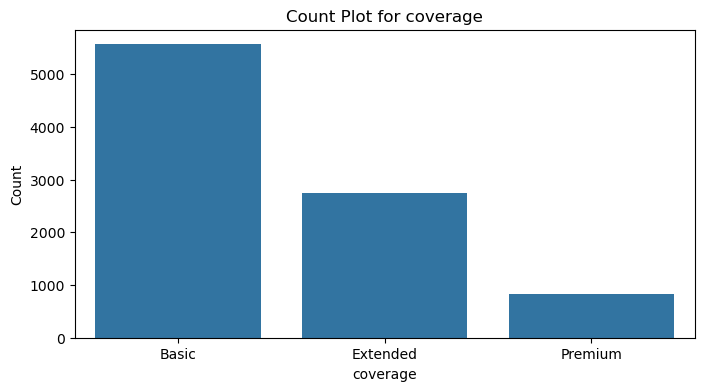

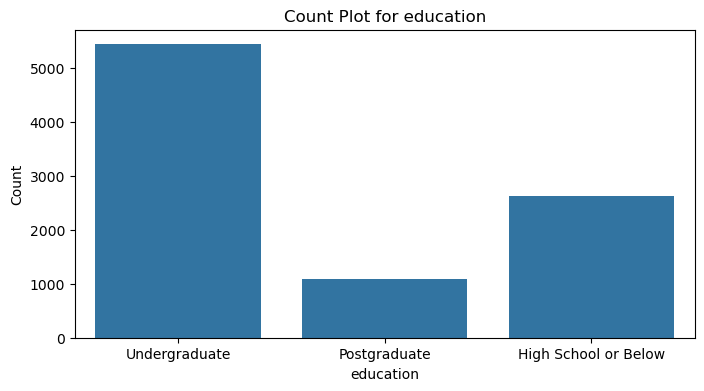

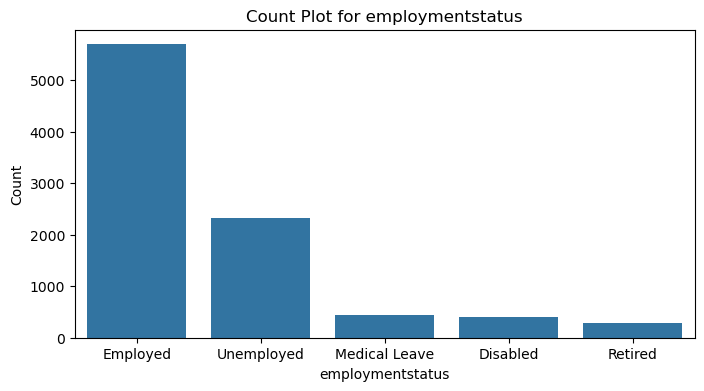

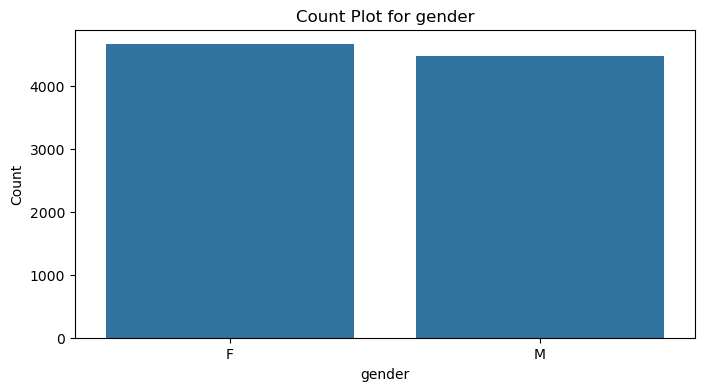

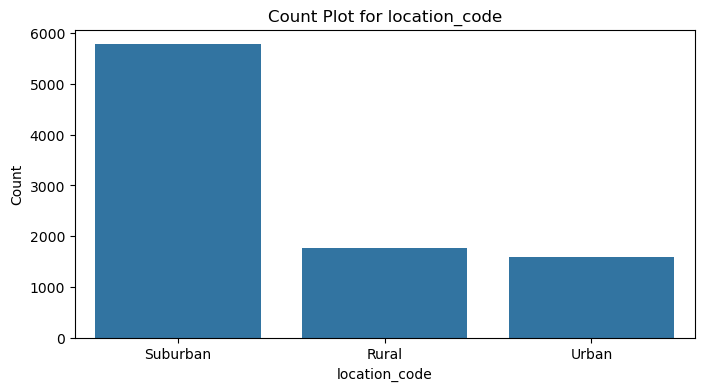

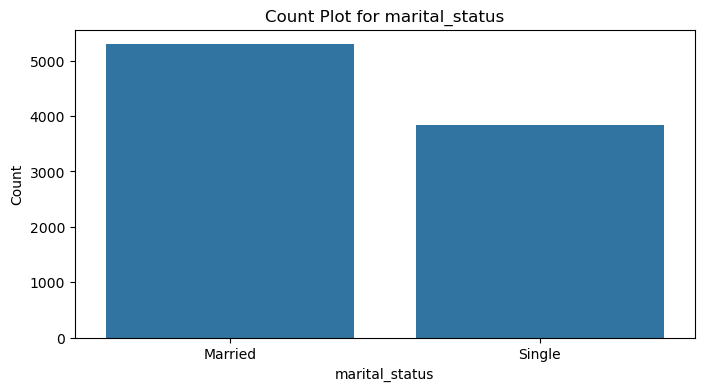

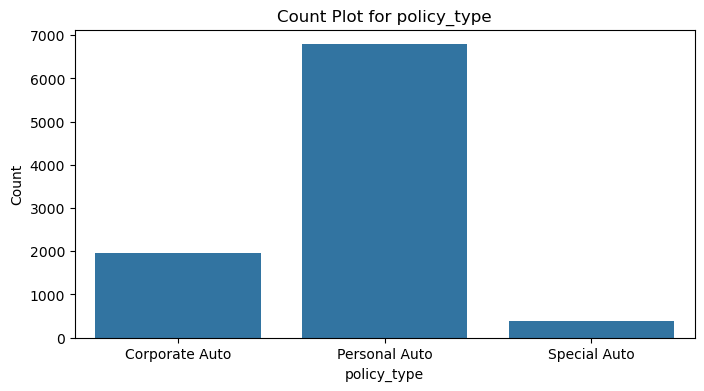

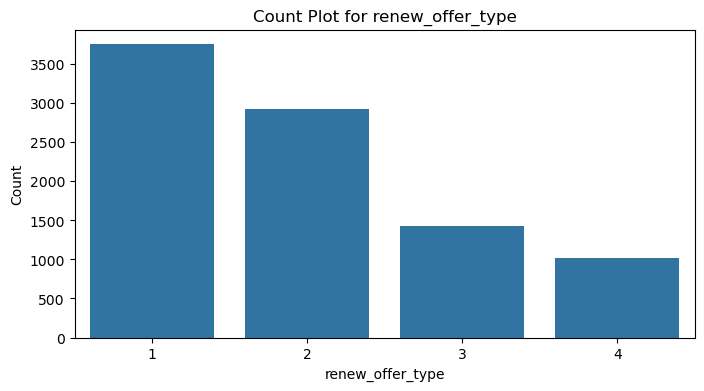

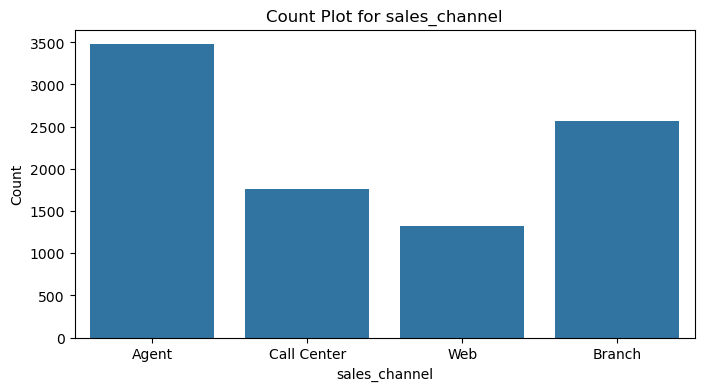

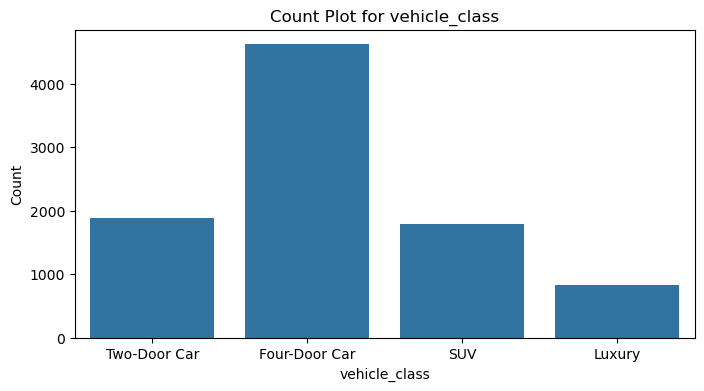

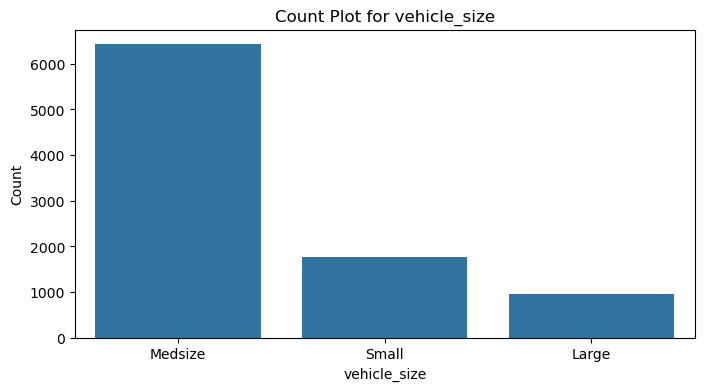

In [40]:
#2. Plot all the categorical variables with the proper plot. What can you see?
for col in cat_data:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=cat_data, x=col)
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

the most state that we have customers from is California
the majority of customers have basic coverage
the majority of our customers have undergraduate degrees
the majority of our customers are employed
we have almost equal percentage of men and women as our customers
the majority of our customers live in suburban areas
the majority of our customers have personal Auto policy type
the majority of our customers have medsized cars

In [41]:
#3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
#I don't really see any redundant columns..

In [43]:
#4.Plot time variable. Can you extract something from it?
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

data['month_year'] = data['effective_to_date'].dt.year * 100 + data['effective_to_date'].dt.month

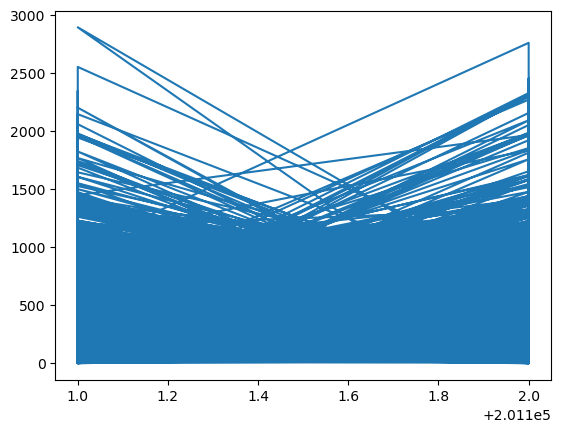

In [44]:
plt.plot(data['month_year'], data['total_claim_amount'])
#I really tried everything.. this is the least crazy chart I got (yes the other ones were even crazier).